<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Trabalho_de_Edeq%20Duda%20e%20Madu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRABALHO EDEQ 2025.2 - EQUAÇÕES DIFERENCIAIS

QUESTÃO 1: RESOLUÇÃO DE PVIs

1a) y' - 3y = -e^x; y(0)=0

1b) y'' - 2y' + 2y = e^x; y(0)=0, y(2)=1

QUESTÃO 2: REATOR BATELADA
Concentração máxima de B: 0.4889 mol/L em t = 15.43 min

QUESTÃO 3: DIFUSÃO DE CO2 EM AR ESTAGNADO


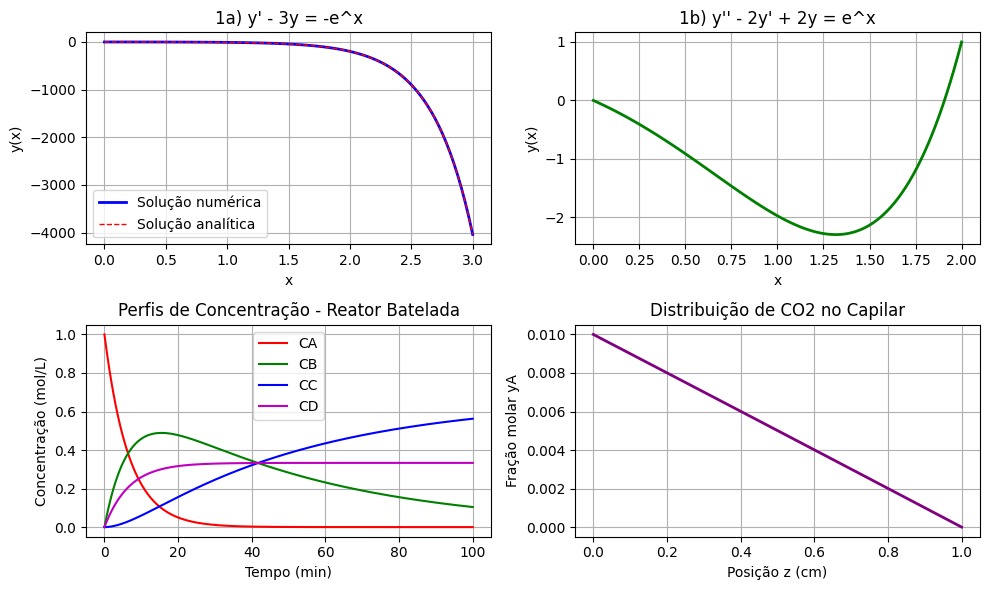


RESULTADOS QUESTÃO 3:
Fluxo molar NAz = 6.737115e-05 mol/(cm²·s)
Fração molar em z=0: 0.0100
Fração molar em z=0.5 cm: 0.004962
Fração molar em z=1 cm: 0.000000

VERIFICAÇÕES:
Concentração total C = 0.0409 mol/L
Variação de yA: 0.0100

SOLUÇÃO SIMBÓLICA (SymPy) PARA QUESTÃO 1a:
Solução simbólica: Eq(y(x), (1/2 - exp(2*x)/2)*exp(x))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, root_scalar
import sympy as sp

print("TRABALHO EDEQ 2025.2 - EQUAÇÕES DIFERENCIAIS")
print("=" * 50)

# QUESTÃO 1
print("\nQUESTÃO 1: RESOLUÇÃO DE PVIs")

# Item 1a) y' - 3y = -e^x; y(0)=0
print("\n1a) y' - 3y = -e^x; y(0)=0")

def edo1a(x, y):
    return 3*y - np.exp(x)

# Resolvendo numericamente
x_span1a = [0, 3]
x_eval1a = np.linspace(0, 3, 100)
sol1a = solve_ivp(edo1a, x_span1a, [0], t_eval=x_eval1a, method='RK45')

# Solução analítica (para comparação)
def sol_analitica1a(x):
    return (np.exp(x) - np.exp(3*x)) / 2

# Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(sol1a.t, sol1a.y[0], 'b-', linewidth=2, label='Solução numérica')
plt.plot(x_eval1a, sol_analitica1a(x_eval1a), 'r--', linewidth=1, label='Solução analítica')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("1a) y' - 3y = -e^x")
plt.legend()
plt.grid(True)

# Item 1b) y'' - 2y' + 2y = e^x; y(0)=0, y(2)=1
print("\n1b) y'' - 2y' + 2y = e^x; y(0)=0, y(2)=1")

def edo1b(x, y):
    # y[0] = y, y[1] = y'
    return [y[1], 2*y[1] - 2*y[0] + np.exp(x)]

def boundary_conditions1b(ya, yb):
    # ya: condições em x=0, yb: condições em x=2
    return [ya[0] - 0, # y(0) = 0
            yb[0] - 1] # y(2) = 1

# Resolvendo problema de valor de contorno
x_eval1b = np.linspace(0, 2, 100)

# Chute inicial para as derivadas
y_init_guess = [0, 1]

from scipy.integrate import solve_bvp

def bc1b(ya, yb):
    return np.array([ya[0], yb[0] - 1])

sol1b = solve_bvp(edo1b, bc1b, x_eval1b, np.zeros((2, x_eval1b.size)))

plt.subplot(2, 2, 2)
if sol1b.success:
    plt.plot(sol1b.x, sol1b.y[0], 'g-', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title("1b) y'' - 2y' + 2y = e^x")
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'Solução não convergiu', ha='center')

# QUESTÃO 2 - REATOR BATELADA
print("\nQUESTÃO 2: REATOR BATELADA")

# Parâmetros cinéticos
K1, K2, K3 = 0.1, 0.05, 0.02 # min⁻¹

# Concentrações iniciais
CA0, CB0, CC0, CD0 = 1.0, 0.0, 0.0, 0.0 # mol/L

def reator_batelada(t, C):
    CA, CB, CC, CD = C
    dCAdt = -K1*CA - K2*CA
    dCBdt = K1*CA - K3*CB
    dCCdt = K3*CB
    dCDdt = K2*CA
    return [dCAdt, dCBdt, dCCdt, dCDdt]

# Resolvendo o sistema
t_span = [0, 100]
t_eval = np.linspace(0, 100, 500)
C0 = [CA0, CB0, CC0, CD0]

sol_reator = solve_ivp(reator_batelada, t_span, C0, t_eval=t_eval, method='RK45')

plt.subplot(2, 2, 3)
plt.plot(sol_reator.t, sol_reator.y[0], 'r-', label='CA')
plt.plot(sol_reator.t, sol_reator.y[1], 'g-', label='CB')
plt.plot(sol_reator.t, sol_reator.y[2], 'b-', label='CC')
plt.plot(sol_reator.t, sol_reator.y[3], 'm-', label='CD')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (mol/L)')
plt.title('Perfis de Concentração - Reator Batelada')
plt.legend()
plt.grid(True)

# Encontrando concentração máxima de B
idx_max = np.argmax(sol_reator.y[1])
t_max = sol_reator.t[idx_max]
CB_max = sol_reator.y[1][idx_max]
print(f"Concentração máxima de B: {CB_max:.4f} mol/L em t = {t_max:.2f} min")

# QUESTÃO 3 - DIFUSÃO EM MEIO ESTAGNADO
print("\nQUESTÃO 3: DIFUSÃO DE CO2 EM AR ESTAGNADO")

# Dados do problema
P = 1.0 # atm
T = 25 + 273.15 # K
R = 0.082057 # L·atm/(mol·K)
C_total = P/(R*T) # mol/L

D_AB = 0.164 # cm²/s
L = 1.0 # cm
yA1, yA2 = 0.01, 0.0

# Resolvendo a equação de difusão
# NAz(1 - yA) = -C·D_AB·(dyA/dz)
# Como NAz é constante, podemos integrar analiticamente

z_values = np.linspace(0, L, 100)

# Para NBz = 0, a solução é:
# ln((1 - yA2)/(1 - yA1)) = (NAz/(C·D_AB))·L
# Mas yA2 = 0, então:
NAz = (C_total * D_AB / L) * np.log((1 - yA2)/(1 - yA1))

# Perfil de concentração
yA_profile = 1 - (1 - yA1) * np.exp(NAz * z_values / (C_total * D_AB))

plt.subplot(2, 2, 4)
plt.plot(z_values, yA_profile, 'purple', linewidth=2)
plt.xlabel('Posição z (cm)')
plt.ylabel('Fração molar yA')
plt.title('Distribuição de CO2 no Capilar')
plt.grid(True)

plt.tight_layout()
plt.show()

# Resultados numéricos
print(f"\nRESULTADOS QUESTÃO 3:")
print(f"Fluxo molar NAz = {NAz:.6e} mol/(cm²·s)")
print(f"Fração molar em z=0: {yA_profile[0]:.4f}")
print(f"Fração molar em z=0.5 cm: {yA_profile[50]:.6f}")
print(f"Fração molar em z=1 cm: {yA_profile[-1]:.6f}")

# Verificação do balanço material
print(f"\nVERIFICAÇÕES:")
print(f"Concentração total C = {C_total:.4f} mol/L")
print(f"Variação de yA: {yA1 - yA2:.4f}")

# Solução simbólica para questão 1a (opcional)
print("\nSOLUÇÃO SIMBÓLICA (SymPy) PARA QUESTÃO 1a:")
x = sp.Symbol('x')
y = sp.Function('y')
edo = sp.Eq(y(x).diff(x) - 3*y(x), -sp.exp(x))
sol_simbolica = sp.dsolve(edo, y(x), ics={y(0): 0})
print("Solução simbólica:", sol_simbolica)